In [86]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balkissabri","key":"213dbffb5ab8f465dc2e7f9f1ab7f700"}'}

In [87]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [88]:
!pip install kaggle

In [89]:
!kaggle datasets download -d computingvictor/transactions-fraud-datasets

Dataset URL: https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets
License(s): apache-2.0
transactions-fraud-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [90]:
!unzip transactions-fraud-datasets.zip

Archive:  transactions-fraud-datasets.zip
replace cards_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cards_data.csv          
replace mcc_codes.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mcc_codes.json          
replace train_fraud_labels.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_fraud_labels.json  y

replace transactions_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: transactions_data.csv   y
y

replace users_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: users_data.csv          


In [91]:
import numpy as np
import pandas as pd
import json

# Data Visualization libraries
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

#Imporing libraries to avoid warnings
import warnings

read datasets

In [92]:


transactions = pd.read_csv('transactions_data.csv')
cards=pd.read_csv('cards_data.csv')
users=pd.read_csv('users_data.csv')

In [93]:
train_fraud_labels=pd.read_json('train_fraud_labels.json')

# read fraud dataset

In [94]:
train_fraud_labels.head()

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No


In [95]:
data = {
    'id': train_fraud_labels.index,
    'Status': train_fraud_labels.iloc[:, 0]
}

In [96]:
df=pd.DataFrame(data)
train_fraud_labels=df.reset_index(drop=True)

In [97]:
train_fraud_labels.head()

,id,Status
0,10649266,No
1,23410063,No
2,9316588,No
3,12478022,No
4,9558530,No


# read mcc dataset

In [98]:


try:
    mcc_codes = pd.read_json('mcc_codes.json', lines=True)
except ValueError:
    # If lines=True fails, try reading without it
    with open('mcc_codes.json', 'r') as f:
        data = json.load(f)  # Load as a Python object

    # If the JSON is a list of dictionaries:
    if isinstance(data, list) and all(isinstance(item, dict) for item in data):
        mcc_codes = pd.DataFrame(data)
    # If not, handle other possible structures accordingly
    # ... (For instance, convert dictionary to DataFrame)
    else:
        # Example: If data is a dictionary, convert values to a list
        if isinstance(data, dict):
            mcc_codes = pd.DataFrame([data])
        else:
            print(f"Unexpected JSON structure: {type(data)}")

print(mcc_codes.head())

                            5812              5541  \
0  Eating Places and Restaurants  Service Stations   

                                   7996                          5411  \
0  Amusement Parks, Carnivals, Circuses  Grocery Stores, Supermarkets   

                    4784                                        4900  \
0  Tolls and Bridge Fees  Utilities - Electric, Gas, Water, Sanitary   

          5942                   5814            4829               5311  ...  \
0  Book Stores  Fast Food Restaurants  Money Transfer  Department Stores  ...   

                              3005          4411        3000  \
0  Miscellaneous Metal Fabrication  Cruise Lines  Steelworks   

                                      5533                     3008  \
0  Automotive Parts and Accessories Stores  Steel Drums and Barrels   

              7549                   5941                        5722  \
0  Towing Services  Sporting Goods Stores  Household Appliance Stores   

                 

In [99]:
mcc_codes.head()

,5812,5541,7996,5411,4784,4900,5942,5814,4829,5311,...,3005,4411,3000,5533,3008,7549,5941,5722,3009,5733
0,Eating Places and Restaurants,Service Stations,"Amusement Parks, Carnivals, Circuses","Grocery Stores, Supermarkets",Tolls and Bridge Fees,"Utilities - Electric, Gas, Water, Sanitary",Book Stores,Fast Food Restaurants,Money Transfer,Department Stores,...,Miscellaneous Metal Fabrication,Cruise Lines,Steelworks,Automotive Parts and Accessories Stores,Steel Drums and Barrels,Towing Services,Sporting Goods Stores,Household Appliance Stores,Fabricated Structural Metal Products,Music Stores - Musical Instruments


In [100]:
mcc_codes = mcc_codes.transpose()

In [101]:
mcc_codes.head()

,0
5812,Eating Places and Restaurants
5541,Service Stations
7996,"Amusement Parks, Carnivals, Circuses"
5411,"Grocery Stores, Supermarkets"
4784,Tolls and Bridge Fees


In [102]:
data = {
    'mcc': mcc_codes.index,
    'Name': mcc_codes.iloc[:, 0]
}

In [103]:
df = pd.DataFrame(data)

print(df)

       mcc                                  Name
5812  5812         Eating Places and Restaurants
5541  5541                      Service Stations
7996  7996  Amusement Parks, Carnivals, Circuses
5411  5411          Grocery Stores, Supermarkets
4784  4784                 Tolls and Bridge Fees
...    ...                                   ...
7549  7549                       Towing Services
5941  5941                 Sporting Goods Stores
5722  5722            Household Appliance Stores
3009  3009  Fabricated Structural Metal Products
5733  5733    Music Stores - Musical Instruments

[109 rows x 2 columns]


In [104]:
# Reinitialize indexes
mcc_codes = df.reset_index(drop=True)

# show dataframe
print(mcc_codes)

      mcc                                  Name
0    5812         Eating Places and Restaurants
1    5541                      Service Stations
2    7996  Amusement Parks, Carnivals, Circuses
3    5411          Grocery Stores, Supermarkets
4    4784                 Tolls and Bridge Fees
..    ...                                   ...
104  7549                       Towing Services
105  5941                 Sporting Goods Stores
106  5722            Household Appliance Stores
107  3009  Fabricated Structural Metal Products
108  5733    Music Stores - Musical Instruments

[109 rows x 2 columns]


In [105]:
# change mcc to int type
mcc_codes['mcc']=pd.to_numeric(mcc_codes['mcc'])

In [106]:
train_fraud_labels['id']=pd.to_numeric(train_fraud_labels['id'])

edit cart data data

In [107]:
# Checking for any duplicated or missing values
print("Total Duplicated values found: ", cards.duplicated().sum())

print("Count of null values in each column are as follows: \n", cards.isnull().sum())

Total Duplicated values found:  0
Count of null values in each column are as follows: 
 id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64


In [108]:
cards=cards[['id','client_id','card_type']]

In [109]:
# Checking if correct datatypes are assigned to the columns

nuuniq = []
dtyp = []
uuniq = []

for col in cards.columns:
    nuuniq.append(cards[col].nunique())
    dtyp.append(cards[col].dtype)
    uuniq.append(cards[col].unique()[0])

pd.DataFrame({"Column Name": cards.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})


,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,6146,int64,4524
1,client_id,2000,int64,825
2,card_type,3,object,Debit


edit users data

In [110]:
users=users[['id','current_age','longitude','latitude','credit_score']]

In [111]:
nuuniq = []
dtyp = []
uuniq = []

for col in users.columns:
    nuuniq.append(users[col].nunique())
    dtyp.append(users[col].dtype)
    uuniq.append(users[col].unique()[0])

pd.DataFrame({"Column Name": users.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})


,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,2000,int64,825.00
1,current_age,80,int64,53.00
2,longitude,1224,float64,-117.76
3,latitude,989,float64,34.15
4,credit_score,321,int64,787.00


In [112]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2000 non-null   int64  
 1   current_age   2000 non-null   int64  
 2   longitude     2000 non-null   float64
 3   latitude      2000 non-null   float64
 4   credit_score  2000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 78.3 KB


edit transactions data

In [113]:
transactions=transactions[['id','client_id','card_id','amount','mcc','use_chip']]

In [114]:
print(transactions.head())

        id  client_id  card_id   amount   mcc           use_chip
0  7475327       1556     2972  $-77.00  5499  Swipe Transaction
1  7475328        561     4575   $14.57  5311  Swipe Transaction
2  7475329       1129      102   $80.00  4829  Swipe Transaction
3  7475331        430     2860  $200.00  4829  Swipe Transaction
4  7475332        848     3915   $46.41  5813  Swipe Transaction


In [115]:
transactions.shape


(13305915, 6)

In [116]:
train_fraud_labels.shape

(8914963, 2)

In [117]:
train_fraud_labels.columns


Index(['id', 'Status'], dtype='object')

In [118]:
train_fraud_labels['Status'].unique()

array(['No', 'Yes'], dtype=object)

In [119]:
fraudulent = train_fraud_labels[train_fraud_labels['Status'] =='Yes' ]
non_fraudulent = train_fraud_labels[train_fraud_labels['Status'] == 'No']

# under sampling non fraud transactions
non_fraudulent_sample = non_fraudulent.sample(n=len(fraudulent), random_state=42)

# combine the two datasets
balanced_dataset = pd.concat([fraudulent, non_fraudulent_sample])

# Mix data
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# show results
print(balanced_dataset['Status'].value_counts())


Status
No     13332
Yes    13332
Name: count, dtype: int64


In [120]:
#merge transaction data with fraud data (df1)
transaction_fraud=pd.merge(transactions,balanced_dataset,on='id',how='inner')

In [121]:
transaction_fraud.shape

(26664, 7)

In [122]:
# Extraxt randomly 5000 rows
transaction_fraud1= transaction_fraud.sample(n=5000, random_state=42)


# show results
print(transaction_fraud1.head())

             id  client_id  card_id   amount   mcc            use_chip Status
20966  20523894        287     3527   $13.63  5310    Chip Transaction    Yes
26365  23609637       1595     2429    $2.07  5812    Chip Transaction     No
20166  19626992        605      212   $87.04  5311    Chip Transaction     No
8763   13277328        240     2147  $108.58  5311  Online Transaction    Yes
7335   12091881        468     4705   $38.52  4814   Swipe Transaction     No


In [123]:
# show results
print(transaction_fraud1['Status'].value_counts())

Status
No     2529
Yes    2471
Name: count, dtype: int64


In [124]:
#merge transaction dataset with mcc dataset
transaction_fraud_mcc=pd.merge(transaction_fraud1,mcc_codes,on='mcc',how='inner')

In [125]:
transaction_fraud_mcc.columns

Index(['id', 'client_id', 'card_id', 'amount', 'mcc', 'use_chip', 'Status',
       'Name'],
      dtype='object')

In [126]:
transaction_fraud_mcc.shape

(5000, 8)

In [127]:
transaction_fraud_mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5000 non-null   int64 
 1   client_id  5000 non-null   int64 
 2   card_id    5000 non-null   int64 
 3   amount     5000 non-null   object
 4   mcc        5000 non-null   int64 
 5   use_chip   5000 non-null   object
 6   Status     5000 non-null   object
 7   Name       5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [128]:
# ci=onvert the amount column inti integer
transaction_fraud_mcc['amount'] = transaction_fraud_mcc['amount'].str.replace('$', '')
transaction_fraud_mcc['amount'] = pd.to_numeric(transaction_fraud_mcc['amount'])
transaction_fraud_mcc.rename(columns = {'amount': 'Amount($)'}, inplace = True)

In [129]:
#show NAN values
transaction_fraud_mcc.isnull().sum()

,0
id,0
client_id,0
card_id,0
Amount($),0
mcc,0
use_chip,0
Status,0
Name,0


handling the invalid values in amount


In [130]:
#handling the invalid value in amount
amt = transaction_fraud_mcc['Amount($)'].sort_values(ascending = True)
amt


,Amount($)
4450,-496.00
2700,-492.00
2242,-488.00
496,-487.00
277,-479.00
...,...
1609,1963.91
1276,2126.53
1571,2318.02
3211,2447.88


In [131]:
#create the payment type of transactions (credit or debit)

amount = transaction_fraud_mcc['Amount($)']
payment_status = []

for val in amount:
    if val < 0:
        payment_status.append('Debit')
    else:
        payment_status.append('Credit')

transaction_fraud_mcc['Payment_Type'] = payment_status

In [132]:
transaction_fraud_mcc.columns

Index(['id', 'client_id', 'card_id', 'Amount($)', 'mcc', 'use_chip', 'Status',
       'Name', 'Payment_Type'],
      dtype='object')

In [133]:
per = transaction_fraud_mcc['Status'].value_counts(normalize = True)*100
per

,proportion
Status,
No,50.58
Yes,49.42


# visualiser le data

<ipython-input-134-792006638892>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  legit = per[0]
<ipython-input-134-792006638892>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fraud = per[1]


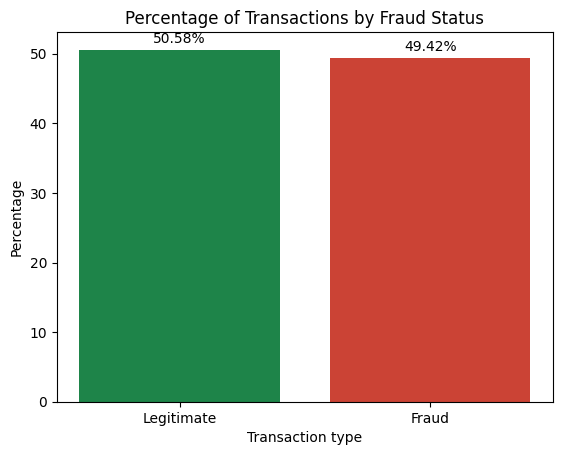

In [134]:


legit = per[0]
fraud = per[1]

percentages = [legit, fraud]
labels = ['Legitimate', 'Fraud']

# Bar chart
plt.bar(labels, percentages, color = ['#1e8449', '#cb4335'])
plt.title('Percentage of Transactions by Fraud Status')
plt.xlabel('Transaction type')
plt.ylabel('Percentage')
for i, v in enumerate(percentages):
  plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center')

plt.show()

In [135]:
# Rename the id columns to avoid conflicts
transaction_fraud_mcc.rename(columns={'id': 'T_id'}, inplace=True)
cards.rename(columns={'id': 'C_id'}, inplace=True)
users.rename(columns={'id': 'CL_id'}, inplace=True)

In [136]:
print(cards.columns)
print(transaction_fraud_mcc.columns)
print(users.columns)

Index(['C_id', 'client_id', 'card_type'], dtype='object')
Index(['T_id', 'client_id', 'card_id', 'Amount($)', 'mcc', 'use_chip',
       'Status', 'Name', 'Payment_Type'],
      dtype='object')
Index(['CL_id', 'current_age', 'longitude', 'latitude', 'credit_score'], dtype='object')


In [137]:
# Join transactions with users using client_id column
df_transactions_users = transaction_fraud_mcc.set_index('client_id').join(
    users.set_index('CL_id'), how='inner', lsuffix='_transactions', rsuffix='_users')

# Join them with cards using card_id column
df_merged = df_transactions_users.set_index('card_id').join(
    cards.set_index('C_id'), how='inner', lsuffix='_transactions_users', rsuffix='_cards')


In [138]:
print(df_merged.columns)
print(df_merged.shape)

Index(['T_id', 'Amount($)', 'mcc', 'use_chip', 'Status', 'Name',
       'Payment_Type', 'current_age', 'longitude', 'latitude', 'credit_score',
       'client_id', 'card_type'],
      dtype='object')
(5000, 13)


In [139]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 3527 to 4948
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_id          5000 non-null   int64  
 1   Amount($)     5000 non-null   float64
 2   mcc           5000 non-null   int64  
 3   use_chip      5000 non-null   object 
 4   Status        5000 non-null   object 
 5   Name          5000 non-null   object 
 6   Payment_Type  5000 non-null   object 
 7   current_age   5000 non-null   int64  
 8   longitude     5000 non-null   float64
 9   latitude      5000 non-null   float64
 10  credit_score  5000 non-null   int64  
 11  client_id     5000 non-null   int64  
 12  card_type     5000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 546.9+ KB
None


In [140]:
print(df_merged.head())

             T_id  Amount($)   mcc            use_chip Status  \
card_id                                                         
3527     20523894      13.63  5310    Chip Transaction    Yes   
2429     23609637       2.07  5812    Chip Transaction     No   
212      19626992      87.04  5311    Chip Transaction     No   
2147     13277328     108.58  5311  Online Transaction    Yes   
4705     12091881      38.52  4814   Swipe Transaction     No   

                                  Name Payment_Type  current_age  longitude  \
card_id                                                                       
3527                   Discount Stores       Credit           42     -95.01   
2429     Eating Places and Restaurants       Credit           47     -73.87   
212                  Department Stores       Credit           42     -73.94   
2147                 Department Stores       Credit           50     -83.29   
4705        Telecommunication Services       Credit           48     -

In [141]:
df_merged.columns

Index(['T_id', 'Amount($)', 'mcc', 'use_chip', 'Status', 'Name',
       'Payment_Type', 'current_age', 'longitude', 'latitude', 'credit_score',
       'client_id', 'card_type'],
      dtype='object')

In [142]:
#index df_merged from 0 to len(df_merged)
df_merged.reset_index(drop=True, inplace=True)

In [143]:
print(df_merged['mcc'].unique())

[5310 5812 5311 4814 4121 5541 7230 4829 5499 4784 5045 5732 5815 7801
 5300 5814 4131 7210 4411 5932 5912 5211 5411 5970 7922 5942 5712 5251
 5651 5094 5813 5816 5941 3395 7349 9402 3393 5719 3640 7538 7996 3009
 8011 5921 8021 4111 5533 4214 4511 3007 7995 7011 3730 4900 5192 3359
 5977 5661 4722 3389 5193 6300 3066 4112 7832 3771 3260 7531 4899 3780
 3390 3722 8099 3509 3006 3405 3387 3596 3684 3144 7802 3775 5655 8049
 3000 1711 3504 3256 5947 3008 5621 8062 5733 7276 8041 7542 3174 3001
 3075 3005 8043 8111 3058 7393 7549 3132 5261]


In [144]:
len(df_merged['mcc'].unique())

107

In [145]:
len(df_merged['Name'].unique())

106

In [146]:
df_merged['Status'].unique()

array(['Yes', 'No'], dtype=object)

In [147]:
df_merged['target']=np.where(df_merged['Status']=='Yes',1,0)

In [148]:
df_merged=df_merged.drop('Status',axis=True)

In [149]:
df_merged.shape

(5000, 13)

In [150]:
df_merged.columns

Index(['T_id', 'Amount($)', 'mcc', 'use_chip', 'Name', 'Payment_Type',
       'current_age', 'longitude', 'latitude', 'credit_score', 'client_id',
       'card_type', 'target'],
      dtype='object')

In [151]:
#drop the id columns
df_merged = df_merged[['Amount($)', 'use_chip', 'card_type', 'mcc', 'current_age', 'credit_score', 'longitude','latitude','target']]


In [152]:
print(df_merged.describe(include='all'))


          Amount($)            use_chip card_type          mcc  current_age  \
count   5000.000000                5000      5000  5000.000000  5000.000000   
unique          NaN                   3         3          NaN          NaN   
top             NaN  Online Transaction     Debit          NaN          NaN   
freq            NaN                1917      2927          NaN          NaN   
mean      74.993842                 NaN       NaN  5404.878600    54.623000   
std      155.186480                 NaN       NaN   935.564713    15.629783   
min     -496.000000                 NaN       NaN  1711.000000    23.000000   
25%       10.547500                 NaN       NaN  5193.000000    43.000000   
50%       43.020000                 NaN       NaN  5411.000000    52.000000   
75%      100.000000                 NaN       NaN  5812.000000    64.000000   
max     2505.580000                 NaN       NaN  9402.000000   101.000000   

        credit_score    longitude     latitude     

In [153]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Amount($)     5000 non-null   float64
 1   use_chip      5000 non-null   object 
 2   card_type     5000 non-null   object 
 3   mcc           5000 non-null   int64  
 4   current_age   5000 non-null   int64  
 5   credit_score  5000 non-null   int64  
 6   longitude     5000 non-null   float64
 7   latitude      5000 non-null   float64
 8   target        5000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB


In [154]:
print(df_merged.isnull().sum())


Amount($)       0
use_chip        0
card_type       0
mcc             0
current_age     0
credit_score    0
longitude       0
latitude        0
target          0
dtype: int64


In [155]:
# To get the unique values for each column, iterate through the columns:
for col in df_merged.columns:
    print(f"Unique values for {col}: {df_merged[col].unique()}")

# Alternatively, to get the number of unique values for each column:
print(df_merged.nunique())

# Or, to see the unique combinations and their counts:
print(df_merged.value_counts())

Unique values for Amount($): [ 13.63   2.07  87.04 ... 147.85 113.59  91.18]
Unique values for use_chip: ['Chip Transaction' 'Online Transaction' 'Swipe Transaction']
Unique values for card_type: ['Debit' 'Credit' 'Debit (Prepaid)']
Unique values for mcc: [5310 5812 5311 4814 4121 5541 7230 4829 5499 4784 5045 5732 5815 7801
 5300 5814 4131 7210 4411 5932 5912 5211 5411 5970 7922 5942 5712 5251
 5651 5094 5813 5816 5941 3395 7349 9402 3393 5719 3640 7538 7996 3009
 8011 5921 8021 4111 5533 4214 4511 3007 7995 7011 3730 4900 5192 3359
 5977 5661 4722 3389 5193 6300 3066 4112 7832 3771 3260 7531 4899 3780
 3390 3722 8099 3509 3006 3405 3387 3596 3684 3144 7802 3775 5655 8049
 3000 1711 3504 3256 5947 3008 5621 8062 5733 7276 8041 7542 3174 3001
 3075 3005 8043 8111 3058 7393 7549 3132 5261]
Unique values for current_age: [ 42  47  50  48  45  41  31  59  58  65  52  40  66  35  36  49  64  53
  63  28  87  43  32  62  27  51  60  24  82 101  44  61  46  56  69  39
  78  34  76  74  33  3

In [156]:
#encoding the categorical variable for data_fraud
cat_columns = df_merged.select_dtypes(include=['object', 'category']).columns


data_fraud1 =pd.get_dummies(df_merged, columns=cat_columns, drop_first=False)
data_fraud1=data_fraud1.astype(int)
print(data_fraud1.head())

   Amount($)   mcc  current_age  credit_score  longitude  latitude  target  \
0         13  5310           42           710        -95        29       1   
1          2  5812           47           753        -73        40       0   
2         87  5311           42           725        -73        40       0   
3        108  5311           50           745        -83        36       1   
4         38  4814           48           714        -91        41       0   

   use_chip_Chip Transaction  use_chip_Online Transaction  \
0                          1                            0   
1                          1                            0   
2                          1                            0   
3                          0                            1   
4                          0                            0   

   use_chip_Swipe Transaction  card_type_Credit  card_type_Debit  \
0                           0                 0                1   
1                           

In [157]:
data_fraud1.shape

(5000, 13)

XGboost

In [158]:
from sklearn.model_selection import train_test_split


X = data_fraud1.drop('target', axis=1)
y = data_fraud1['target']

# split data int train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [159]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Classification binaire
    eval_metric='logloss',        # Log loss comme métrique d'évaluation
    use_label_encoder=False,      # Désactive le label encoder
    random_state=42,              # Fixer la graine pour la reproductibilité
    scale_pos_weight=1            # Poids pour les classes déséquilibrées
)

# training
model.fit(X_train_scaled, y_train)

# Predicting
y_pred = model.predict(X_test_scaled)

# evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       499
           1       0.88      0.87      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

Confusion Matrix:
[[441  58]
 [ 65 436]]


In [160]:
# Predict if a transaction is fraudulent or not
def predict_transaction(model, scaler, transaction_data):

    # Normalize transaction data
    transaction_data_scaled = scaler.transform([transaction_data])

    # Prediction
    prediction = model.predict(transaction_data_scaled)


    return prediction[0]

In [161]:
# Example of transaction prediction
# Replace values with your transaction data
new_transaction = [500,1,0,0,0,0,1, 5310, 20, 700, -90, 29]  # Exemple de données pour 'Amount($)', 'use_chip', etc.

#predict
result = predict_transaction(model, scaler, new_transaction)

# show result
if result == 1:
    print("Cette transaction est prédite comme FRAUDULEUSE.")
else:
    print("Cette transaction est prédite comme NON FRAUDULEUSE.")

Cette transaction est prédite comme FRAUDULEUSE.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [162]:
import joblib
#save the model
joblib.dump(model, "model.pkl")


['model.pkl']

In [163]:
from google.colab import files
#download the model
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>